## প্যান্ডাসের মৌলিক উদাহরণ

এই নোটবুকটি আপনাকে কিছু খুব সাধারণ প্যান্ডাস ধারণার মাধ্যমে পরিচিত করাবে। আমরা সাধারণ ডেটা সায়েন্স লাইব্রেরি আমদানি করার মাধ্যমে শুরু করব:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### সিরিজ

সিরিজ হলো একটি তালিকা বা 1D-অ্যারে, তবে এতে ইনডেক্স থাকে। সমস্ত অপারেশন ইনডেক্সের সাথে সামঞ্জস্যপূর্ণ।


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


সিরিজের একটি সাধারণ ব্যবহার হলো **টাইম সিরিজ**। টাইম সিরিজে, ইনডেক্সের একটি বিশেষ গঠন থাকে - সাধারণত তারিখ বা ডেটটাইমের একটি পরিসর। আমরা `pd.date_range` ব্যবহার করে এমন একটি ইনডেক্স তৈরি করতে পারি।

ধরুন আমাদের কাছে একটি সিরিজ আছে যা প্রতিদিন কেনা পণ্যের পরিমাণ দেখায়, এবং আমরা জানি যে প্রতি রবিবার আমাদের জন্যও একটি আইটেম নিতে হবে। সিরিজ ব্যবহার করে এটি কীভাবে মডেল করা যায় তা এখানে দেখানো হলো:


Length of index is 366


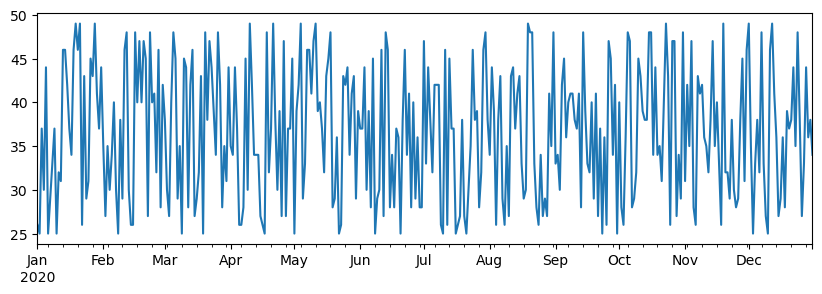

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


যেমন আপনি দেখতে পাচ্ছেন, আমরা এখানে সমস্যার সম্মুখীন হচ্ছি, কারণ সাপ্তাহিক সিরিজে উল্লেখ না করা দিনগুলো অনুপস্থিত (`NaN`) হিসেবে গণ্য করা হয়, এবং একটি সংখ্যার সাথে `NaN` যোগ করলে আমাদের `NaN` পাওয়া যায়। সঠিক ফলাফল পেতে, আমাদের সিরিজ যোগ করার সময় `fill_value` নির্দিষ্ট করতে হবে:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


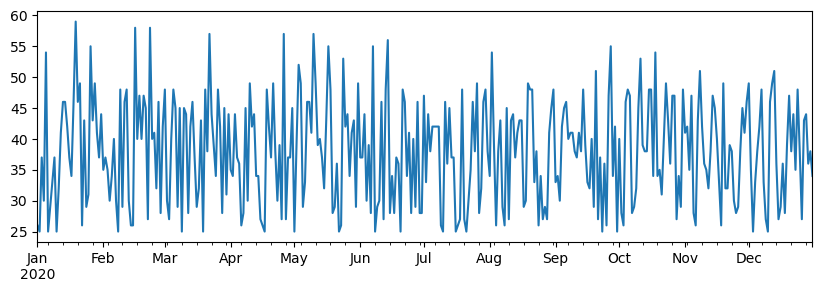

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

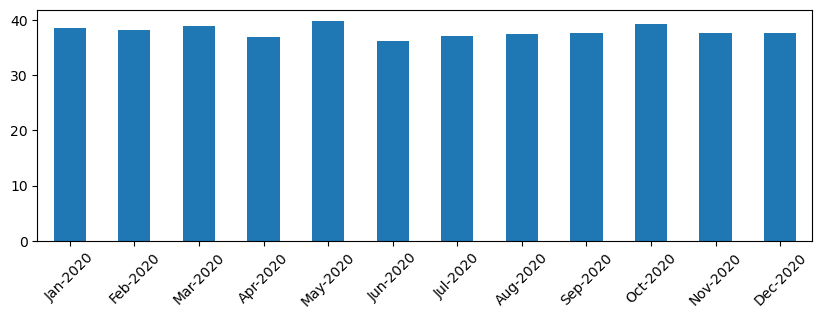

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## ডেটাফ্রেম

ডেটাফ্রেম মূলত একই ইনডেক্স সহ সিরিজগুলোর একটি সংগ্রহ। আমরা একাধিক সিরিজ একসাথে মিলিয়ে একটি ডেটাফ্রেম তৈরি করতে পারি। উপরে সংজ্ঞায়িত `a` এবং `b` সিরিজগুলোর ভিত্তিতে:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

আমরা সিরিজকে কলাম হিসাবেও ব্যবহার করতে পারি এবং ডিকশনারি ব্যবহার করে কলামের নাম নির্দিষ্ট করতে পারি:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

একই ফলাফল অর্জন করা যেতে পারে ট্রান্সপোজ করে (এবং তারপর কলামগুলোর নাম পরিবর্তন করে, পূর্বের উদাহরণের সাথে মিল করার জন্য):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**ডেটাফ্রেম থেকে কলাম নির্বাচন** এভাবে করা যেতে পারে:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**ফিল্টার এক্সপ্রেশনের** ভিত্তিতে সারি নির্বাচন:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

যেভাবে এটি কাজ করে তা হলো `df['A']<5` অভিব্যক্তিটি একটি বুলিয়ান সিরিজ প্রদান করে, যা প্রতিটি সিরিজের উপাদানের জন্য অভিব্যক্তিটি `True` বা `False` কিনা তা নির্দেশ করে। যখন সিরিজটি একটি সূচক হিসাবে ব্যবহার করা হয়, এটি DataFrame-এর সারিগুলির একটি উপসেট প্রদান করে। সুতরাং, ইচ্ছামতো পাইথন বুলিয়ান অভিব্যক্তি ব্যবহার করা সম্ভব নয়, উদাহরণস্বরূপ, `df[df['A']>5 and df['A']<7]` লেখা ভুল হবে। এর পরিবর্তে, আপনাকে বুলিয়ান সিরিজে বিশেষ `&` অপারেশন ব্যবহার করতে হবে:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**নতুন গণনাযোগ্য কলাম তৈরি করা**। আমরা সহজেই আমাদের DataFrame এর জন্য নতুন গণনাযোগ্য কলাম তৈরি করতে পারি স্বজ্ঞাত অভিব্যক্তি ব্যবহার করে। নিচের কোডটি A এর গড় মান থেকে তার বিচ্যুতি গণনা করে।


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

আমরা আসলে যা করছি তা হলো একটি সিরিজ গণনা করছি, এবং তারপর এই সিরিজটি বাম পাশের দিকে নির্ধারণ করছি, একটি নতুন কলাম তৈরি করছি।


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

**সংখ্যার উপর ভিত্তি করে সারি নির্বাচন** `iloc` কনস্ট্রাক্ট ব্যবহার করে করা যেতে পারে। উদাহরণস্বরূপ, DataFrame থেকে প্রথম ৫টি সারি নির্বাচন করতে:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**গ্রুপিং** প্রায়ই এক্সেলের *পিভট টেবিলের* মতো ফলাফল পেতে ব্যবহৃত হয়। ধরুন আমরা `LenB` এর প্রতিটি প্রদত্ত সংখ্যার জন্য কলাম `A` এর গড় মান গণনা করতে চাই। তখন আমরা আমাদের DataFrame-কে `LenB` দ্বারা গ্রুপ করতে পারি এবং `mean` কল করতে পারি:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

যদি আমাদের গোষ্ঠীর গড় এবং উপাদানগুলির সংখ্যা গণনা করতে হয়, তাহলে আমরা আরও জটিল `aggregate` ফাংশন ব্যবহার করতে পারি:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## প্রিন্টিং এবং প্লটিং

ডেটা সায়েন্টিস্টদের প্রায়ই ডেটা অন্বেষণ করতে হয়, তাই এটি ভিজ্যুয়ালাইজ করতে পারা গুরুত্বপূর্ণ। যখন DataFrame বড় হয়, তখন অনেক সময় আমরা শুধু নিশ্চিত করতে চাই যে আমরা সবকিছু সঠিকভাবে করছি কিনা, প্রথম কয়েকটি সারি প্রিন্ট করে দেখে। এটি `df.head()` কল করে করা যেতে পারে। যদি আপনি এটি Jupyter Notebook থেকে চালান, এটি DataFrame-কে একটি সুন্দর ট্যাবুলার ফর্মে প্রিন্ট করবে।


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

আমরা ইতিমধ্যেই কিছু কলাম ভিজুয়ালাইজ করার জন্য `plot` ফাংশনের ব্যবহার দেখেছি। যদিও `plot` অনেক কাজের জন্য খুবই উপযোগী এবং `kind=` প্যারামিটারের মাধ্যমে বিভিন্ন ধরনের গ্রাফ সমর্থন করে, আপনি সবসময় আরও জটিল কিছু প্লট করার জন্য কাঁচা `matplotlib` লাইব্রেরি ব্যবহার করতে পারেন। আমরা আলাদা কোর্স পাঠে ডেটা ভিজুয়ালাইজেশন বিস্তারিতভাবে আলোচনা করব।


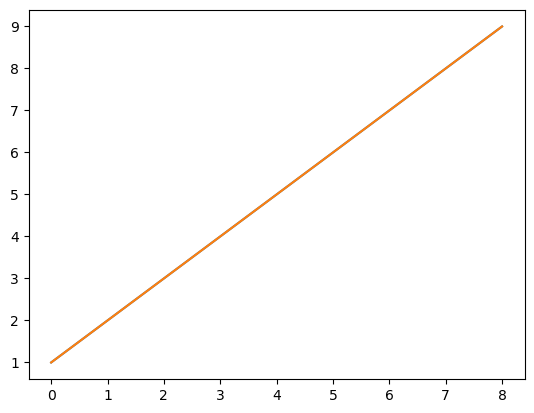

In [61]:
df['A'].plot()
plt.show()

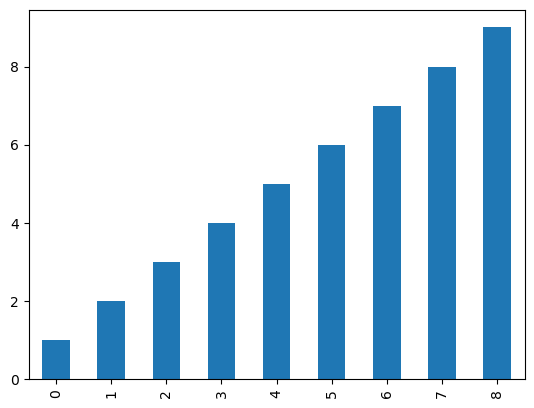

In [63]:
df['A'].plot(kind='bar')
plt.show()

এই সংক্ষিপ্ত পর্যালোচনায় Pandas-এর সবচেয়ে গুরুত্বপূর্ণ ধারণাগুলি অন্তর্ভুক্ত করা হয়েছে, তবে এই লাইব্রেরি অত্যন্ত সমৃদ্ধ এবং এর মাধ্যমে আপনি যা করতে পারেন তার কোনো সীমা নেই! এখন চলুন এই জ্ঞান ব্যবহার করে নির্দিষ্ট সমস্যার সমাধান করি।



---

**অস্বীকৃতি**:  
এই নথিটি AI অনুবাদ পরিষেবা [Co-op Translator](https://github.com/Azure/co-op-translator) ব্যবহার করে অনুবাদ করা হয়েছে। আমরা যথাসম্ভব সঠিক অনুবাদ প্রদানের চেষ্টা করি, তবে অনুগ্রহ করে মনে রাখবেন যে স্বয়ংক্রিয় অনুবাদে ত্রুটি বা অসঙ্গতি থাকতে পারে। মূল ভাষায় থাকা নথিটিকে প্রামাণিক উৎস হিসেবে বিবেচনা করা উচিত। গুরুত্বপূর্ণ তথ্যের জন্য, পেশাদার মানব অনুবাদ সুপারিশ করা হয়। এই অনুবাদ ব্যবহারের ফলে কোনো ভুল বোঝাবুঝি বা ভুল ব্যাখ্যা হলে আমরা তার জন্য দায়বদ্ধ থাকব না।
